In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import io3d

In [44]:
io3d.datasets.DATASET_PATH_STRUCTURE["pilsen_pigs"]={
    '_': 'medical/orig/pilsen_pigs/Tx{id:03d}D_{subtype}/MASKS_DICOM/{data_type}/', # masks
    'data3d': 'medical/orig/pilsen_pigs/Tx{id:03d}D_{subtype}/PATIENT_DICOM/Tx{id:03d}D_{subtype}.mhd' # intensity data
}

In [45]:
X = np.load("../data.npy")
target = np.load("../target.npy")

In [48]:
import sklearn.utils
cl_name = ["background", "object"]

cls, cts = np.unique(target, return_counts=True)
mn = np.min(cts)
balanced_data = []
balanced_target = []
for cl in cls:
    x_i = sklearn.utils.resample(X[(target==cl).flatten()], n_samples=mn)
    y_i = np.array([cl_name[int(cl)]] * len(x_i))
    balanced_target.append(y_i)
    balanced_data.append(x_i)

balanced_data = np.concatenate(balanced_data, axis=0)
balanced_target = np.concatenate(balanced_target, axis=0)

In [49]:
columns=["intensity", "gradient", "sagittal", "coronall", "axial"]
df = pd.DataFrame(balanced_data,
                  columns=columns[:balanced_data.shape[1]]
                  )
df["target"] = balanced_target
df.keys()
# df
# df[0]

Index(['intensity', 'gradient', 'sagittal', 'coronall', 'axial', 'target'], dtype='object')

<AxesSubplot:xlabel='intensity', ylabel='Density'>

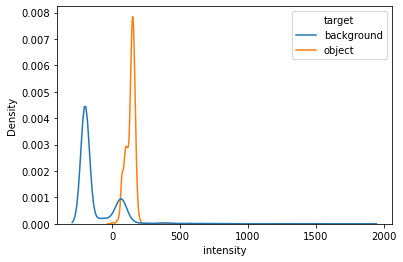

In [56]:
sns.kdeplot(data=df, x="intensity", hue="target")
# sns.displot(data=df, x="intensity", hue="target")

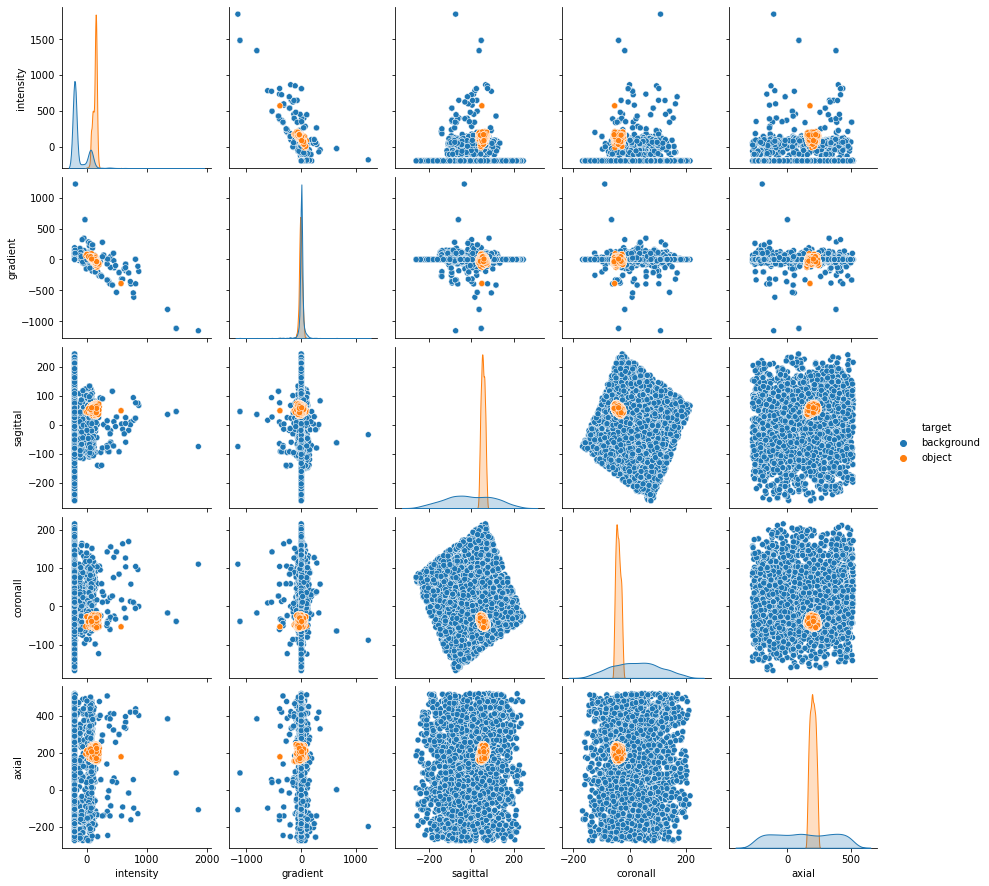

In [52]:
sns.pairplot(df, hue="target")

